# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

In [2]:
# change this line your folder where the data is found
basedir = '/Users/c21010417/Documents/projects/CMT309'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [3]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [161]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,t,12,42,62,123,2020-12-13,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,t,3,3,3,3,2020-12-13,339,31,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,57%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,...,t,7,7,7,33,2020-12-13,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,t,26,56,84,219,2020-12-13,219,12,0,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/p

In [162]:
df['price']

0         $59.00
1        $236.00
2        $125.00
3        $135.00
4         $75.00
          ...   
18517    $330.00
18518    $350.00
18519     $60.00
18520     $67.00
18521     $96.00
Name: price, Length: 18522, dtype: object

## Question 1a

In [163]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    # List of columns to be dropped
    cols_to_drop = ['scrape_id','last_scraped','description','listing_url','neighbourhood',
                  'calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url',
                  'host_about','host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 
                  'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights',
                  'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                  'maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count',
                  'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms']
    # Using pandas drop function to drop the list of columns
    df = df.drop(cols_to_drop, axis=1)
    return df

In [164]:
df = drop_cols(df)
len(df.columns)

45

In [166]:
def drop_cols_na(df, threshold=0.5):
    """Drops columns with percentage nulls above input threshold
    
    Inputs
    ------
    pd.dataframe
    int: fraction of nulls as threshold
    
    Outputs
    -------
    pd.dataframe: with null cols removed
    
    """
    # Calculating the proportion of nulls of each column as a number from 0 to 1
    null_percentages = (df.isnull().sum()/len(df))
    # Setting the threshold of proportion of nulls, where if exceeded the column will be dropped
    thresh = threshold
    # Creating an empty list where columns that exceed that exceed the threshold will be appended to
    cols_to_drop = []
    # Creating a counter to track the index numbers of the null_percentages dataframe, so column names can be obtained 
    n = 0
    # For loop through each column in null_percentages
    for x in null_percentages:

        # Counter to increase by 1 with each iteration of the loop

        if x > thresh:
            # Column added to list of columns to drop if null_proportion exceeds the threshold
            cols_to_drop.append(null_percentages.index[n])
        n +=1
    
    # Using pandas drop function to drop the list of columns
    df.drop(cols_to_drop, axis=1,inplace=True)
  
    return df

In [167]:
df = drop_cols_na(df, 0.5)

In [168]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

## Question 1b

In [33]:
pd.set_option('display.max_columns',50)
df.head(1)


        

,id,name,host_id,host_name,host_since,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,Indische Buurt,1.0,t,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,Private room,2,$59.00,3,1125,62,123,278,1,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0


In [169]:
def binary_encoding(df):
    """Encodes true and false columns with 1 or 0
    
    Inputs
    -----
    pd.dataframe
    
    
    Outputs
    ------
    pd.dataframe

    """
    # Creating empty list of columns to hold columns to encode
    cols_to_encode = []
    # Looping through all columns to find those with strings 'f' and 't'
    for x in df.columns:
        if df[x][0] == (('t') or ('f')):
            cols_to_encode.append(x)
    # Changing values in cols_to_encode to 1 or 0 from 't' or 'f'
    for col in cols_to_encode:
        df.loc[df[col] == 't', col] = 1
        df.loc[df[col] == 'f', col] = 0
    return df

In [170]:
df = binary_encoding(df)

In [171]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [172]:
# hint: check Pandas to_datetime method
from datetime import datetime
def add_host_days(df):
    """Adds column with number of days a host has been listed
    
    Inputs
    ------
    pd.dataframe
    
    Outputs
    -------
    pd.dataframe
    """
    df['host_days'] = (datetime.now() - pd.to_datetime(df['host_since'])).dt.days
    return df

In [173]:
import re
def convert_price(df):
    """Conerts price col from string to float
    
    Inputs
    ------
    pd.dataframe
    
    Outputs
    ------
    pd.dataframe
    """
    df['price'] = df['price'].apply(lambda x: re.sub('[^0-9]', '', x.split('.')[0]))
    df['price'] = df['price'].apply(lambda x: float(x))
    return df

In [174]:
df = add_host_days(df)
df = convert_price(df)

In [175]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'],
      dtype='object')

In [176]:
df['price']

0         59.0
1        236.0
2        125.0
3        135.0
4         75.0
         ...  
18517    330.0
18518    350.0
18519     60.0
18520     67.0
18521     96.0
Name: price, Length: 18522, dtype: float64

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [177]:
# How many hosts offer 2 or more properties for rent?
(df['host_name'].value_counts()>=2).sum()

2149

In [178]:
# What is the highest price for a listing?
max(df['price'])

8000.0

In [179]:
# What is the ID of the listing that has the largest number of bedrooms?
df['bedrooms'].idxmax()

18352

In [180]:
# What is the ID of the listing with the largest advertised price
df['price'].idxmax()

88

In [181]:
# There are different room types. How many listings are there for the most common room type?
len(df.loc[df['room_type']==(df['room_type'].mode())[0]])

14433

In [182]:
# How many hosts are there that have been registered for more than 3000 days?
len(df.loc[df['host_days']>3000])

2610

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

Text(0, 0.5, 'Neighbourhood')

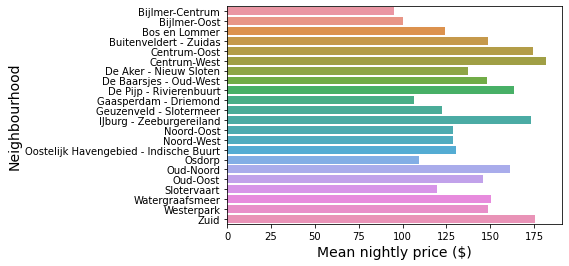

In [183]:
# your code...
df_mean_neighbourhood = df.groupby(['neighbourhood_cleansed'])['price'].agg('mean')
sns.barplot(y=df_mean_neighbourhood.index, x=df_mean_neighbourhood.values, orient = 'h')
plt.xlabel('Mean nightly price ($)', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=14)

Plot a correlation matrix as instructed in the Coursework proforma:

<AxesSubplot:>

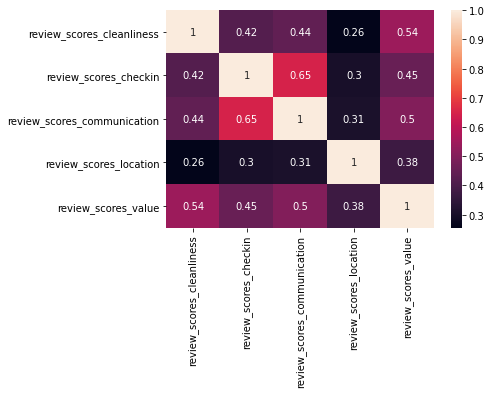

In [184]:
# your code...
# Create separate dataframe containaing the variables to put into corr matrix
review_df = df[['review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location',
                'review_scores_value']]
# Corr matrix
corr_matrix = review_df.corr()
sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

Plot a geographical distribution as instructed in the Coursework proforma:

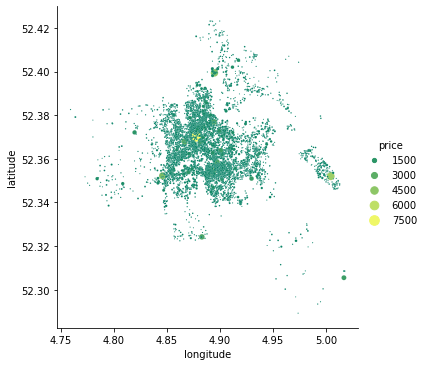

In [185]:
# your code...
# Use scatterplot with lon/lat and hue for price as dot size and colour
geog_df = df.loc[df['price']>150]
geog_df = geog_df[['price','latitude','longitude']]

sns.relplot(x='longitude', y='latitude', hue='price', size='price',sizes=(1,100),palette='summer' ,data=geog_df)

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [53]:
# your linear regression code...
import statsmodels.api as sm
review_df = df[['review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location',
                'review_scores_value','review_scores_rating','review_scores_accuracy']]
review_df = review_df.dropna()
Y= review_df['review_scores_rating']
X = review_df.drop(['review_scores_rating'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                          19:46:34   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3169      0.550     -0.577      0.564      -1.394       0.760
review_scores_cleanliness       2.1438      0.041     52.279      0.000       2.063       2.224
review_scores_checkin           1.0232      0.060     16.913      0.000       0.905       1.142
review_scores_communication     1.8090      0.066     27.490      0.000       1.680       1.938
review_scores_location          0.3988      0.045      8.858      0.000       0.311       0.487
review_scores_value             1.9905      0.047     42.354      0.000       1.898       2.083
review_scores_accuracy          2.6153      0.056     46.889      0.000       2.506       2.725
==============================================================================
Omnibus:                     4769.894   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90176.958
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                      14.514   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[double click to edit]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...


In [30]:
# your t-test code...
from scipy import stats
t_vals = np.empty((4,4))
p_vals = np.empty((4,4))
counter = 0
for roomtype in df['room_type'].value_counts().index:
    t_vals[counter,0], p_vals[counter,0] = scipy.stats.ttest_ind(df['price'].loc[df.room_type==roomtype],
                                     df['price'].loc[df.room_type=='Entire home/apt'], equal_var=False)
    t_vals[counter,1], p_vals[counter,1] = scipy.stats.ttest_ind(df['price'].loc[df.room_type==roomtype],
                                     df['price'].loc[df.room_type=='Private room'], equal_var=False)
    t_vals[counter,2], p_vals[counter,2] = scipy.stats.ttest_ind(df['price'].loc[df.room_type==roomtype],
                                     df['price'].loc[df.room_type=='Hotel room'], equal_var=False)
    t_vals[counter,3], p_vals[counter,3] = scipy.stats.ttest_ind(df['price'].loc[df.room_type==roomtype],
                                     df['price'].loc[df.room_type=='Shared room'], equal_var=False)
    counter = counter + 1

    



In [31]:
for roomtype in df['room_type'].value_counts().index:
    print(roomtype)

Entire home/apt
Private room
Hotel room
Shared room


In [32]:
t_vals # each iteration is one row#
# enire home and private room differ lot
# entire home and shared room differ 


array([[  0.        ,  35.86278755,   2.6069607 ,   4.05754853],
       [-35.86278755,   0.        ,  -2.54084445,  -0.69560149],
       [ -2.6069607 ,   2.54084445,   0.        ,   1.21926439],
       [ -4.05754853,   0.69560149,  -1.21926439,   0.        ]])

In [33]:
df['price'].loc[df.room_type=='Entire home/apt']

2        125.0
6        219.0
7        160.0
8        211.0
9         67.0
         ...  
18514     50.0
18516    275.0
18517    330.0
18518    350.0
18519     60.0
Name: price, Length: 14433, dtype: float64

## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

In [54]:
df1 = df

In [55]:
df.dtypes

id                               int64
name                            object
host_id                          int64
host_name                       object
host_since                      object
host_neighbourhood              object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood_cleansed          object
property_type                   object
room_type                       object
accommodates                     int64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

Selected vars: property_type, room_type, accommodates, number_of_reviews, review_scores_rating, beds, neighbourhood_cleansed, review_scores_value, host_identity_verified, license

In [36]:
categorical_vars = [col for col in dict(df.dtypes) if dict(df.dtypes)[col] in ['object']] 
categorical_vars

['name',
 'host_name',
 'host_since',
 'host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'first_review',
 'last_review']

In [58]:
categorical_vars = ['host_identity_verified','room_type']
numerical_vars = ['accommodates', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                  'review_scores_location','number_of_reviews' ,'review_scores_value','host_days','price']

In [59]:
df_d = pd.get_dummies(df[numerical_vars+categorical_vars], columns = categorical_vars)

In [69]:
def variable_selection(df, predictors, target, alpha):
    
    """Input dataframe with all features and will drop a feature if it results in a lower r-squared. 
       Uses 'Price' as the Y variable.
       
    PARAMATERS
    ----------
    df : input dataframe with all variables
    predictors: list with inital selection of variables
    target: target variable for regression
    alpha: significance level for selecting significant predictors
    
    RETURN
    ------
    selected variables: list of selected variables
    """
    print('-------STAGE 1: adding variables---------')
    # Setting starting variables
    best_vars = []
    predictors = predictors.tolist()
    predictors.remove(target)
    top_var = ''
    r2_1 = 0.1
    r2_2 = 0
    # While loop to keep iterating the process until r_squared score no longer improves
    while (r2_2 < r2_1):
        # Appending a top scoring feature to the selected_variables
        if (top_var not in best_vars and top_var != ''):
            print('Appending to best vars: ',top_var )
            best_vars.append(top_var) 
            # Predictors to not include variables in best_vars
            predictors = set(best_vars)^set(predictors)
      
        # Looping through all the features in predicors
        for var in (predictors):
            r2_1=r2_2
            best_vars.append(var)
            vars_to_use = best_vars
            current_df = df[vars_to_use+ [target]]
            # NA values cannot go into OLS
            current_df = current_df.dropna()
            Y= current_df[target]
            X=current_df.drop(target, axis=1)
            X=sm.add_constant(X)
            r2_2 = ((sm.OLS(Y,X)).fit()).rsquared
            #remaining_vars.remove(var)
            vars_to_use.remove(var)
            if r2_2 > r2_1:
                print('New top var: ', var)
                #r2_1 = r2_2
                top_var = var
                
    
    return best_vars
 

"   \n    variables = X.columns.tolist()\n    variables.remove('const')\n    selected_variables = X.columns.tolist()\n    for col in variables:\n        print('Testing feature performance:', col)\n        # First iteration\n        model = sm.OLS(Y,X)\n        results = model.fit()\n        r2f = results.rsquared\n        # Second iteration\n        X = df.drop(col, axis=1)\n        model = sm.OLS(Y,X)\n        results = model.fit()\n        r2s = results.rsquared\n        if r2s > r2f:\n            print(col, 'has been removed')\n            selected_variables.remove(col)\n    print('Number of selected variables =', len(selected_variables, 'out of:',len(variables)))\n    \n    return df[selected_variables]\n"

In [93]:
def variable_selection(df, predictors, target, alpha):
    
    """Input dataframe with all features and will drop a feature if it results in a lower r-squared. 
       Uses 'Price' as the Y variable.
       
    PARAMATERS
    ----------
    df : input dataframe with all variables
    predictors: list with inital selection of variables
    target: target variable for regression
    alpha: significance level for selecting significant predictors
    
    RETURN
    ------
    selected variables: list of selected variables
    """
    print('-------STAGE 1: adding variables---------')
    # Setting starting variables
    best_vars = []
    predictors = predictors.tolist()
    predictors.remove(target)
    top_var = ''
    r2_1 = 0.1
    r2_2 = 0
    ## ADDING VARIABLES
    # While loop to keep iterating the process until r_squared score no longer improves
    while (r2_2 < r2_1):
        # Appending a top scoring feature to the selected_variables
        if (top_var not in best_vars and top_var != ''):
            print('Appending to best vars: ',top_var )
            best_vars.append(top_var) 
            # Predictors to not include variables in best_vars
            predictors = set(best_vars)^set(predictors)
      
        # Looping through all the features in predicors
        for var in (predictors):
            r2_1=r2_2
            # Declaring variables to use in OLS
            vars_to_use = best_vars
            vars_to_use.append(var)
            current_df = df[vars_to_use+ [target]]
            # NA values cannot go into OLS
            current_df = current_df.dropna()
            Y= current_df[target]
            X=current_df.drop(target, axis=1)
            X=sm.add_constant(X)
            # New r_squared score
            r2_2 = ((sm.OLS(Y,X)).fit()).rsquared
            # Removing the current variable so it doesn't go into OLS again
            vars_to_use.remove(var)
            # If the r_squared is better  than the previous then it will be inplace to be added to selected features
            if r2_2 > r2_1:
                print('New top var: ', var)
                top_var = var
    print('-------STAGE 2: removing non-significant variables---------')            
    ## REMOVING NON-SIGNIFICANT VARAIBLES  
    pred = best_vars
    for var, index in zip(best_vars, range(0, len(best_vars))):
        vars_to_use = pred
        current_df = df[vars_to_use+ [target]]
        # NA values cannot go into OLS
        current_df = current_df.dropna()
        Y= current_df[target]
        X=current_df.drop(target, axis=1)
        X=sm.add_constant(X)
        # New r_squared score
        pval = ((sm.OLS(Y,X)).fit()).pvalues[index]
        print(var,' has pval: ', pval)
        if pval <= alpha:
            print(var, 'is non-significant and will be removed')
            pred.remove(var)
    
    print('The significant variables to level alpha are: ',pred)
    
    return pred

In [94]:
selected_vars = variable_selection(df_d, predictors= df_d.columns, target='price', alpha=0.05 )

-------STAGE 1: adding variables---------
New top var:  accommodates
New top var:  review_scores_location
New top var:  number_of_reviews
New top var:  host_days
New top var:  room_type_Entire home/apt
New top var:  room_type_Private room
Appending to best vars:  room_type_Private room
New top var:  number_of_reviews
New top var:  review_scores_location
New top var:  review_scores_value
New top var:  room_type_Entire home/apt
New top var:  room_type_Shared room
New top var:  accommodates
New top var:  review_scores_rating
Appending to best vars:  review_scores_rating
New top var:  number_of_reviews
New top var:  review_scores_location
New top var:  review_scores_value
New top var:  room_type_Shared room
New top var:  accommodates
New top var:  review_scores_accuracy
Appending to best vars:  review_scores_accuracy
New top var:  number_of_reviews
New top var:  review_scores_location
New top var:  review_scores_value
New top var:  room_type_Shared room
New top var:  accommodates
Appending

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [156]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    """Given a price range, this function will recommend a neighbourhood with the most available properties
    Inputs
    ------
    pd.dataframe
    budget_min: int
    budget_max: int
    relative: boolean - If true will give the proportion of availble rentals out of total
                        If false will use the total number of rentals regardless of price range
    
    Outputs
    ------
    recommended neighbourood: string

    """
    if not relative:
        df = df.loc[(df.price >=budget_min)&(df.price <= budget_max)]
        absolute_counts = df['neighbourhood_cleansed'].value_counts()
        recommendation = absolute_counts.idxmax()
        
    if relative:
        df1 = df.loc[(df.price >=budget_min)&(df.price <= budget_max)]
        relative_counts = df1['neighbourhood_cleansed'].value_counts()/df['neighbourhood_cleansed'].value_counts()
        recommendation = relative_counts.idxmax()
        
    return recommendation


In [158]:
recommend_neighbourhood(df, 50, 100, False)

'De Baarsjes - Oud-West'

### Price recommender for hosts

In [218]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type):
    """Will recommend a price/night to list an airbnb given the location and room_type, finds out
       the price from previous listings
       
    Inputs
    ------
    pd.dataframe
    latitude: int
    longitude: int
    n_neighbours: int - number of properties to take into account
    
    Output
    ------
    recommended_price: int 
    """
    # Selecting room type
    df = df.loc[df.room_type == room_type]
    # Calculating euclidean distance from host's property
    df['dist_from_host'] =np.sqrt(np.square(df['latitude']-latitude) + np.square(df['longitude']))
    # Listing the top n_neighbours closest properties to the host
    df_price = df.nsmallest(n_neighbours,'dist_from_host')
    # Finding the mean price of all of these properties
    recommended_price = df_price['price'].mean()
    
    return recommended_price

In [220]:
recommend_price(df ,53.36, 4.941,5,'Private room' )

<ipython-input-218-e14f61227341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_from_host'] =np.sqrt(np.square(df['latitude']-latitude) + np.square(df['longitude']))


59.2